In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
import joblib

SINCE WE HAVE NO DATASET, WE NEED TO CREATE A RANDOM DATASET

In [113]:
# Number of samples
num_samples = 1000

# Generate sample data
np.random.seed(42)
data = {
    'purchase_frequency': np.random.randint(1, 20, num_samples),
    'time_since_last_purchase': np.random.randint(1, 365, num_samples),
    'amount_spent': np.random.uniform(10, 1000, num_samples).round(2),
    'age': np.random.randint(18, 70, num_samples),
    'customer_service_interactions': np.random.randint(0, 10, num_samples),
    'churn': np.random.choice([0, 1], num_samples)  # Target variable
}

# Create a DataFrame
data = pd.DataFrame(data)
data.head()


,purchase_frequency,time_since_last_purchase,amount_spent,age,customer_service_interactions,churn
0,7,162,601.08,69,8,1
1,15,87,679.08,37,5,1
2,11,55,448.29,49,4,0
3,8,288,451.33,67,9,1
4,7,178,727.27,31,6,1


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   purchase_frequency             1000 non-null   int32  
 1   time_since_last_purchase       1000 non-null   int32  
 2   amount_spent                   1000 non-null   float64
 3   age                            1000 non-null   int32  
 4   customer_service_interactions  1000 non-null   int32  
 5   churn                          1000 non-null   int32  
dtypes: float64(1), int32(5)
memory usage: 27.5 KB


DATA PREPROCESSING

In [115]:
data.isnull().sum()

purchase_frequency               0
time_since_last_purchase         0
amount_spent                     0
age                              0
customer_service_interactions    0
churn                            0
dtype: int64

STANDARDIZING THE FEATURES DATA

In [116]:
scaler = StandardScaler()
features_to_scale = ['age', 'purchase_frequency', 'time_since_last_purchase', 'amount_spent', 'customer_service_interactions']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
data.head()

,purchase_frequency,time_since_last_purchase,amount_spent,age,customer_service_interactions,churn
0,-0.486132,-0.192649,0.363073,1.695383,1.194288,1
1,0.930130,-0.893431,0.634642,-0.442890,0.143287,1
2,0.221999,-1.192431,-0.168888,0.358963,-0.207047,0
3,-0.309099,0.984663,-0.158304,1.561741,1.544622,1
4,-0.486132,-0.043149,0.802423,-0.843816,0.493620,1


DEFINING FEATURES AND TARGET VARIABLES

In [117]:
X = data.drop(columns = ['churn'])
y = data['churn']

DATA SPLITTING

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL SELECTION

In [119]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


EVALUATION PHASE BASED ON THE MODEL PERFORMANCE

In [121]:
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.56
Precision: 0.5543478260869565
Recall: 0.5204081632653061
AUC-ROC: 0.5592236894757903
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       102
           1       0.55      0.52      0.54        98

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



In [122]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Performance:
Accuracy: 0.495
Precision: 0.4845360824742268
Recall: 0.47959183673469385
AUC-ROC: 0.49469787915166064
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       102
           1       0.48      0.48      0.48        98

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



MODEL SAVING

In [123]:
# Save the models using joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(rf_clf, 'random_forest_model.pkl')


['random_forest_model.pkl']

VISUALIZATIONS

Plotting Confusion Matrix for Logistic Regression

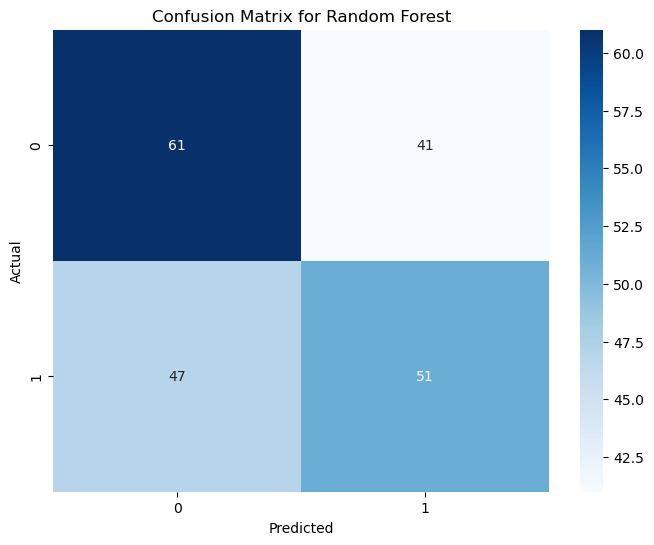

In [124]:
# Plotting Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Plotting Confusion Matrix for Random Forest

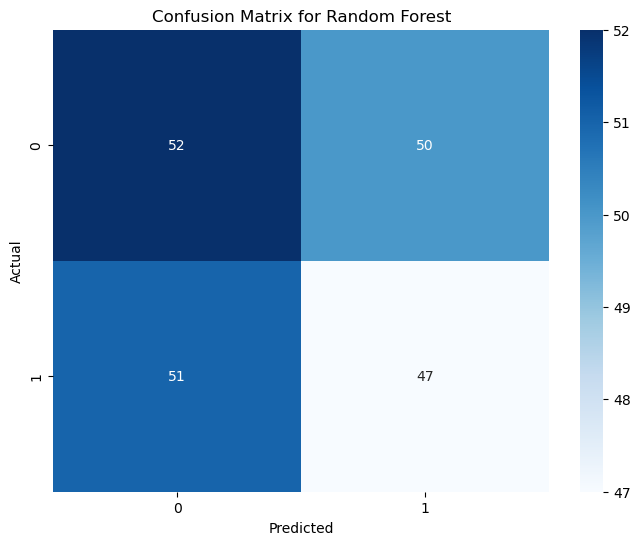

In [125]:
# Plotting Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


FEATURE IMPORTANCE FOR THE LOGISTIC REGRESSION BASED ON COEFFICIENT

                         Feature  Coefficient
3                            age     0.095255
1       time_since_last_purchase    -0.088406
0             purchase_frequency     0.072195
2                   amount_spent     0.054567
4  customer_service_interactions     0.015580


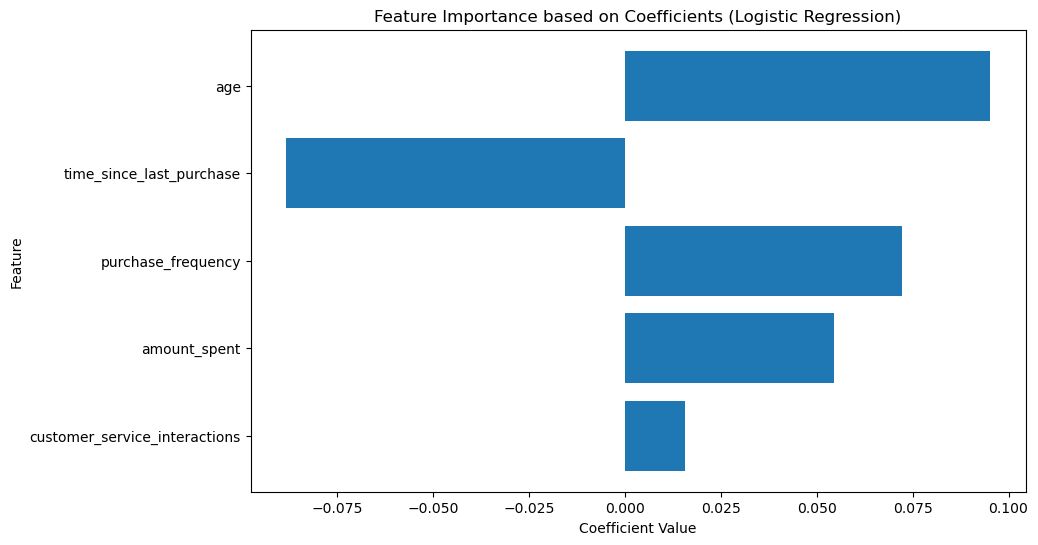

In [127]:
# `model` is your trained LogisticRegression instance
coefficients = model.coef_[0]
feature_names = X.columns

# Creating a DataFrame to visualize the coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sorting features by the absolute value of coefficients
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Displaying the top features
print(importance_df[['Feature', 'Coefficient']])

import matplotlib.pyplot as plt

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance based on Coefficients (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()


FEATURE IMPORTANCE FOR THE RANDOM FOREST

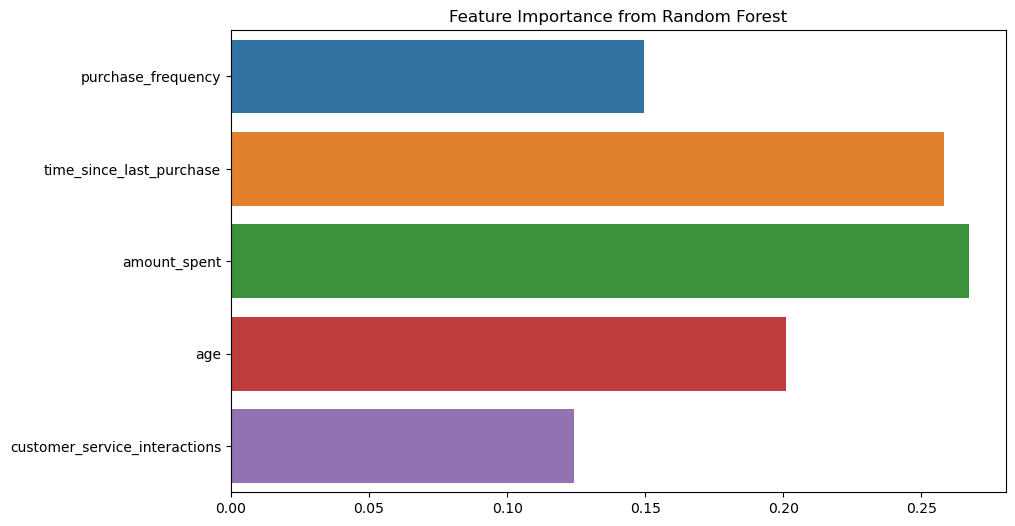

In [109]:
# Feature importance from Random Forest
importances = rf_clf.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.show()


PREDICTION

In [129]:
# Drop the target variable column if it exists in the data (e.g., 'churn')
data_features = data.drop(columns=['churn'], errors='ignore') 

# Ensure the data has the same columns as the training data (you might need to reorder them)
data_features = data_features[model.feature_names_in_]

# Make predictions using the trained model
predictions = model.predict(data_features)

# Get the probability of churn (1 - indicating churn)
prediction_probabilities = model.predict_proba(data_features)[:, 1]  # Probability of churn

# Create a DataFrame for results to display predictions and probabilities
results = data.copy()  # Retain the original data
results['Predicted_Churn'] = predictions
results['Churn_Probability'] = prediction_probabilities

# Display the results
print(results[['Predicted_Churn', 'Churn_Probability']])



     Predicted_Churn  Churn_Probability
0                  1           0.544755
1                  1           0.534561
2                  1           0.535155
3                  1           0.513117
4                  0           0.484373
..               ...                ...
995                1           0.512870
996                1           0.516875
997                1           0.512051
998                0           0.462569
999                0           0.481091

[1000 rows x 2 columns]
